<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [199]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [200]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [201]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [202]:
""" beta is twice of each of 1000 gamma values """
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  

In [203]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [204]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [205]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [206]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [207]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [208]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [209]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,356.557690,1.283129e+02,515.129367,312.173940,1.062289e+02,581.597119,1.132195
1,766.434874,1.010626e+02,132.502525,755.478254,1.048199e+02,139.701891,0.139871
2,203.560003,1.043017e+00,795.396980,203.316021,6.873514e-01,795.996628,1.406165
3,202.857788,1.741474e-02,797.124797,202.855587,1.419145e-02,797.130221,0.688817
4,202.917723,1.051845e-01,796.977093,202.904774,8.622625e-02,797.008999,0.668962
...,...,...,...,...,...,...,...
995,202.845901,2.515101e-06,797.154096,202.845901,1.736730e-06,797.154097,1.246556
996,202.845900,-4.142044e-10,797.154100,202.845900,-3.869743e-10,797.154100,1.245095
997,911.488226,4.267372e+01,45.838051,907.543232,4.444998e+01,48.006787,0.099581
998,207.341633,6.464896e+00,786.193472,205.886226,4.398244e+00,789.715530,1.312670


In [210]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [211]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6
0,1.930679e-01,8.336259e-01,0.646211,1.373218e-01,6.901431e-01,0.729590,0.565419
1,7.078893e-01,6.565854e-01,0.166219,6.941356e-01,6.809886e-01,0.175246,0.068476
2,8.969409e-04,6.776291e-03,0.997796,5.904969e-04,4.465551e-03,0.998548,0.702619
3,1.493227e-05,1.131404e-04,0.999963,1.216849e-05,9.219834e-05,0.999970,0.343381
4,9.021287e-05,6.833646e-04,0.999778,7.394998e-05,5.601906e-04,0.999818,0.333438
...,...,...,...,...,...,...,...
995,2.156917e-09,1.634325e-08,1.000000,1.489531e-09,1.128619e-08,1.000000,0.622689
996,9.342527e-14,4.015750e-13,1.000000,9.409140e-14,5.783273e-13,1.000000,0.621957
997,8.900819e-01,2.772434e-01,0.057502,8.851372e-01,2.887805e-01,0.060217,0.048299
998,5.646813e-03,4.200126e-02,0.986250,3.818812e-03,2.857430e-02,0.990669,0.655798


In [212]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [214]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
  
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.177575302397099
R2 score of training set is 0.6231164031970295


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.18331706214642654
R2 score of test set is 0.5761405282426675


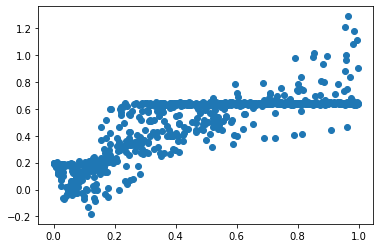

In [215]:
plt.scatter(y_train,y_train_predicted)

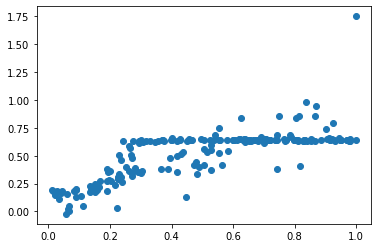

In [216]:
plt.scatter(y_test,y_test_predict)

In [217]:
SE_train = (y_train - y_train_predicted)**2
MSE_train = SE_train.sum() /800
RMSE_train = np.sqrt(MSE_train)
RMSE_train

0.177575302397099

In [218]:
SE_test = (y_test - y_test_predict)**2
MSE_test = SE_test.sum() /200
RMSE_test = np.sqrt(MSE_test)
RMSE_test

0.18331706214642654

In [87]:
train_list = []
for i in range(1,801):
  train_list.append(i)

In [88]:
test_list  = []
for i in range(1,201):
  test_list.append(i)

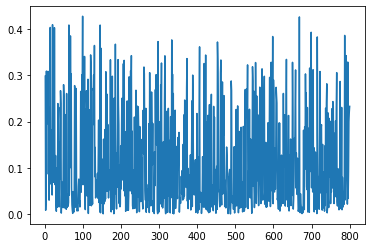

In [89]:
plt.figure(figsize=(6,4))
plt.plot(train_list,np.sqrt(SE_train))

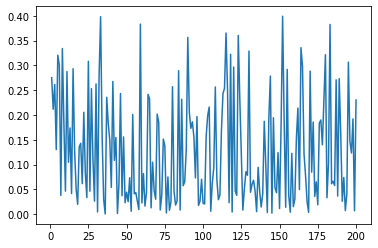

In [90]:
plt.figure(figsize=(6,4))
plt.plot(test_list,np.sqrt(SE_test))